Question 1

Is there a significant relationship between customer profile data and success of the marketing campaign?

In [10]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("Dataset/preprocessed_dataset.csv")
df1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,2,2,84835.0,0,0,0,189,104,379,111,...,1,0,0,0,0,0,1,0,6,51
1,2,4,57091.0,0,0,0,464,5,64,7,...,5,0,0,0,0,1,1,0,1,60
2,2,3,67267.0,0,1,0,134,11,59,15,...,2,0,0,0,0,0,0,0,7,63
3,2,5,32474.0,1,1,0,10,0,1,0,...,7,0,0,0,0,0,0,0,0,54
4,2,4,21474.0,1,0,0,6,16,24,11,...,7,1,0,0,0,0,1,0,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,372,18,126,47,...,4,0,0,0,0,0,0,0,7,45
2236,0,3,31056.0,1,0,99,5,10,13,3,...,8,0,0,0,0,0,0,0,6,44
2237,2,2,46310.0,1,0,99,185,2,88,15,...,8,0,0,0,0,0,0,0,6,45
2238,2,3,65819.0,0,0,99,267,38,701,149,...,3,0,0,0,0,0,0,0,3,43


In [2]:
df_customer_profile_data = df1[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Complain', 'Country', 'Age' , 'Response' ]]
df_customer_profile_data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Country,Age,Response
0,2,2,84835.0,0,0,0,0,6,51,1
1,2,4,57091.0,0,0,0,0,1,60,1
2,2,3,67267.0,0,1,0,0,7,63,0
3,2,5,32474.0,1,1,0,0,0,54,0
4,2,4,21474.0,1,0,0,0,6,32,1
...,...,...,...,...,...,...,...,...,...,...
2235,4,2,66476.0,0,1,99,0,7,45,0
2236,0,3,31056.0,1,0,99,0,6,44,0
2237,2,2,46310.0,1,0,99,0,6,45,0
2238,2,3,65819.0,0,0,99,0,3,43,0


Using Statistical Method

a. Chi-Square
To find the relation between categorical columns ('Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain', 'Country' , 'Response') vs Response(Output variable)

In [3]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = df1[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Complain', 'Country' , 'Response']]

resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                Education  Marital_Status   Kidhome      Teenhome  Complain  \
Education        0.000000    6.829017e-01  0.083134  2.120148e-04  0.082107   
Marital_Status   0.966607    0.000000e+00  0.836601  9.353665e-01  0.880154   
Kidhome          0.146962    7.747579e-02  0.000000  3.571112e-01  0.124323   
Teenhome         0.000003    1.154275e-02  0.043105  0.000000e+00  0.909533   
Complain         0.119416    9.873946e-01  0.166328  7.462889e-01  0.000000   
Country          0.305675    2.126878e-03  0.391724  7.740495e-01  0.197113   
Response         0.000589    8.159662e-08  0.001976  1.662901e-11  0.940595   

                 Country      Response  
Education       0.241902  1.782801e-03  
Marital_Status  0.965012  7.636447e-01  
Kidhome         0.271028  2.226218e-03  
Teenhome        0.896938  2.231197e-08  
Complain        0.763148  9.359122e-01  
Country         0.000000  2.905541e-01  
Response        0.139004  0.000000e+00  


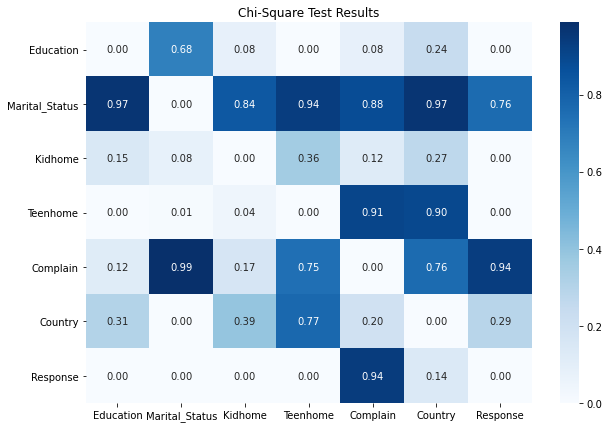

In [7]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(resultant, annot=True, cmap='Blues', fmt='.2f')
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
From the result, it is understood that

1. There is a conclusive evidence that Education and Response are dependent to each other as the p-value is < 0.005
2. There is no conclusive evidence that Marital_status  and Response are dependent to each other as the p-value is > 0.005
3. There is a conclusive evidence that kidhome and Response are dependent to each other as the p-value is < 0.005
4. There is a conclusive evidence that Teenhome and Response are dependent to each other as the p-value is < 0.005
5. There is no conclusive evidence that Complain and Response are dependent to each other as the p-value is > 0.005
6. There is no conclusive evidence that Country and Response are dependent to each other as the p-value is > 0.005


Report to the Question1,

Is there a significant relationship between customer profile data and success of the marketing campaign?

Yes, there are significant relationship between customer profile data and success of the marketing campaign. 
a. The column 'Education', 'kidhome', 'teenhome' are highly correlated with the output column 'Response'
b. Refer below

In [ ]:
Finding Correlation between continious data

In [11]:
df = df1[['Income','Recency',  'Age' , 'Response' ]]

In [20]:
corr = df.corr()

<AxesSubplot:>

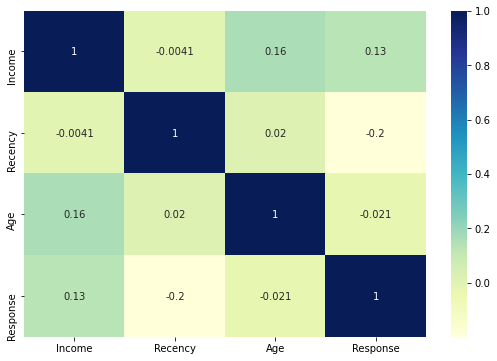

In [26]:
import seaborn as sn
f, ax = plt.subplots(figsize=(9, 6))

sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [ ]:
Correlation of variables between 'Income','Recency',  'Age' , 'Response' are in range of -0.5 to +0.5.
b. All four continious variables  'Income','Recency',  'Age' , 'Response' are correlated to each other